<a href="https://colab.research.google.com/github/Zobia12/DL-and-ML-approach-for-Parkinson-s-Diesease-Detection-using--Voice-signals/blob/main/Parkinsons_DetectionUSING_DL_and_ML_approch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import pandas as pd 
import numpy as np 
import os, sys

In [163]:
data = pd.read_csv('parkinsons.data')
print(data.iloc[[0]])


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007    0.0037   0.00554     0.01109       0.04374  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  

[1 rows x 24 columns]


In [164]:
data.shape

(195, 24)

In [165]:
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


# **Data Preprocessing**

In [166]:
data_processed = data.iloc[:, 1:2].values

# **Data Normalization**

In [167]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_scaled = scaler.fit_transform(data_processed)

In [168]:
data['status']

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64

In [169]:
predictors = data.drop(['name'], axis = 1)
predictors = predictors.drop(['status'], axis = 1)
print(predictors.columns)
target = data['status']

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
X = scaler.fit_transform(predictors)
Y = target

In [171]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .25, random_state = 7)

# logistic Regression

In [172]:
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Logistic Regression: ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))


Logistic Regression: 
0.8775510204081632
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.90      0.95      0.92        39

    accuracy                           0.88        49
   macro avg       0.83      0.77      0.80        49
weighted avg       0.87      0.88      0.87        49



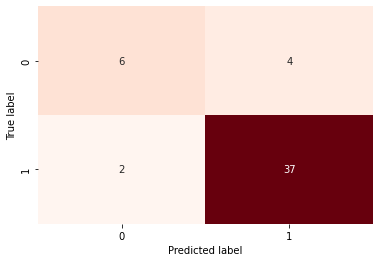

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True, cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Gaussian Naive Bayes

In [174]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Gaussian Naive Bayes:")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))


Gaussian Naive Bayes:
0.6938775510204082
              precision    recall  f1-score   support

           0       0.38      0.80      0.52        10
           1       0.93      0.67      0.78        39

    accuracy                           0.69        49
   macro avg       0.65      0.73      0.65        49
weighted avg       0.82      0.69      0.72        49



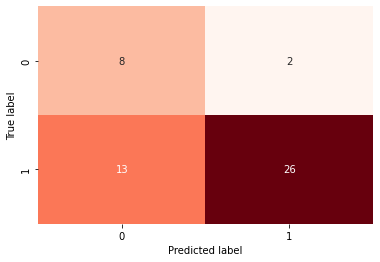

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True, cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# KNN

In [176]:
#K-Nearest Neighbor (BEST ONE 98%%)
from sklearn import datasets
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("k-Nearest Neighbor: ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))

k-Nearest Neighbor: 
0.9795918367346939
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.99        39

    accuracy                           0.98        49
   macro avg       0.99      0.95      0.97        49
weighted avg       0.98      0.98      0.98        49



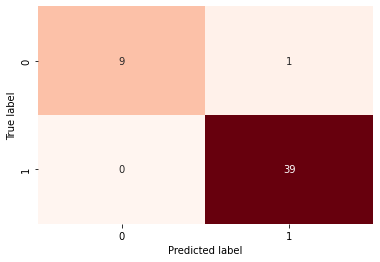

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True,cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Support Vector Machine

In [178]:
# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Support Vector Machine: ")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))

Support Vector Machine: 
0.8979591836734694
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.89      1.00      0.94        39

    accuracy                           0.90        49
   macro avg       0.94      0.75      0.80        49
weighted avg       0.91      0.90      0.88        49



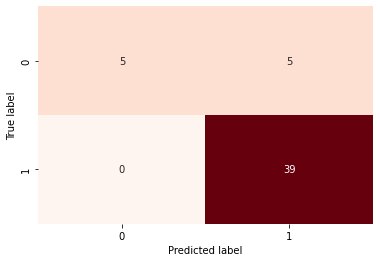

In [179]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True,cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Decision Tree Classifier

In [180]:
# Classification and Regression Trees
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Classification and Regression Trees")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))

Classification and Regression Trees
0.9591836734693877
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        39

    accuracy                           0.96        49
   macro avg       0.94      0.94      0.94        49
weighted avg       0.96      0.96      0.96        49



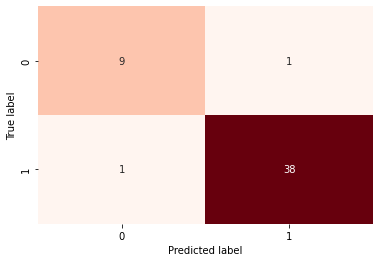

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True,cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **Linear Discriminant Analysis**

In [182]:
# Linear Descriminant Analysis
from sklearn import datasets
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Linear Descriminant Analysis")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))

Linear Descriminant Analysis
0.8775510204081632
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.88      0.97      0.93        39

    accuracy                           0.88        49
   macro avg       0.86      0.74      0.78        49
weighted avg       0.87      0.88      0.87        49



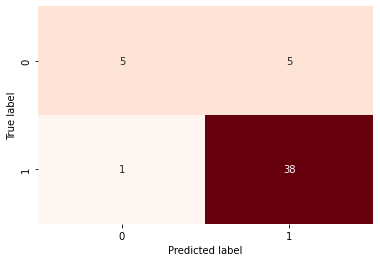

In [183]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True,cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### XGBoost Classifier

In [184]:
# XGBosst Classifier
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn import metrics
model = XGBClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("XGBosst Classifier")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))

XGBosst Classifier
0.9591836734693877
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.95      1.00      0.97        39

    accuracy                           0.96        49
   macro avg       0.98      0.90      0.93        49
weighted avg       0.96      0.96      0.96        49



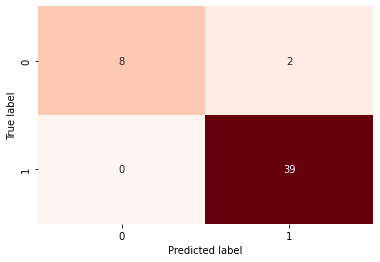

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True,cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Random Forest Classifier

In [186]:
# Random Forest Classifier
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
model = RandomForestClassifier()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Random Forest Classifier")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))

Random Forest Classifier
0.9387755102040817
              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.93      1.00      0.96        39

    accuracy                           0.94        49
   macro avg       0.96      0.85      0.89        49
weighted avg       0.94      0.94      0.93        49



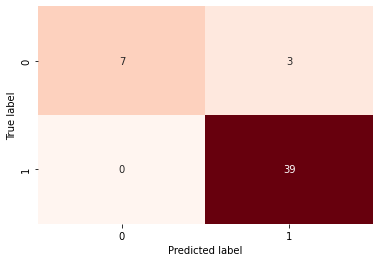

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cmatrix=metrics.confusion_matrix(Y_test, y_pred)
sns.heatmap(cmatrix, annot=True,cbar=False,cmap=plt.cm.Reds)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# **DEEP LEARNING ALGORITHMS**



In [188]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import confusion_matrix, classification_report
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [189]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
predictors = data.drop(['name'], axis = 1)
predictors = predictors.drop(['status'], axis = 1)

y = data['status'].copy()
X = predictors
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)


In [190]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
114,206.327,226.355,92.020,0.00495,0.00002,0.00302,0.00246,0.00905,0.02105,0.209,...,0.01604,0.03320,0.01048,21.864,0.331508,0.715121,-6.729713,0.181701,2.938114,0.115515
95,157.447,163.267,149.605,0.00369,0.00002,0.00201,0.00197,0.00602,0.03272,0.283,...,0.02571,0.05439,0.01018,21.693,0.447285,0.705658,-6.247076,0.180528,2.344348,0.164916
147,183.520,216.814,161.340,0.01466,0.00008,0.00849,0.00819,0.02546,0.06050,0.618,...,0.06359,0.08595,0.06057,14.367,0.478024,0.768974,-4.276605,0.355736,3.142364,0.336085
52,128.001,138.052,122.080,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.210,...,0.01677,0.03969,0.00481,24.692,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308
24,163.656,200.841,76.779,0.00742,0.00005,0.00380,0.00390,0.01140,0.01659,0.164,...,0.01497,0.02214,0.01778,23.831,0.397937,0.732479,-5.557447,0.220890,2.692176,0.215961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,168.778,232.181,75.603,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.348,...,0.03430,0.04322,0.02919,20.376,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788
98,125.791,140.557,96.206,0.01378,0.00011,0.00826,0.00655,0.02478,0.04689,0.422,...,0.03908,0.07625,0.10323,15.433,0.571010,0.690892,-5.159169,0.202146,2.441612,0.260375
66,140.341,159.774,67.021,0.00817,0.00006,0.00430,0.00440,0.01289,0.03198,0.313,...,0.02428,0.05490,0.02183,19.560,0.460139,0.720908,-5.409423,0.226850,2.359973,0.226156
126,138.145,197.238,81.114,0.00544,0.00004,0.00294,0.00327,0.00883,0.02791,0.246,...,0.02259,0.04451,0.01794,18.178,0.623209,0.738245,-5.540351,0.087165,1.821297,0.214075


In [191]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from tensorflow.keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [192]:
# x_train= np.array(X_train)
# test = np.array([np.array(PIL.Image.open(image), dtype=np.float32) for image in image_list],
#                 dtype=object)
test = np.array([np.array(X_train, dtype=np.float32)], dtype=object)
# test = [np.array(X_train), dtype=np.float32) for image in image_list]
inputs= tf.keras.Input(shape=(test).shape[1],)

# inputs = np.array([np.array(val) for val in X_train]) 
expand_dims = tf.expand_dims(inputs, axis=2)
gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)
outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 136)]             0         
                                                                 
 tf.expand_dims_8 (TFOpLambd  (None, 136, 1)           0         
 a)                                                              
                                                                 
 gru_9 (GRU)                 (None, 136, 256)          198912    
                                                                 
 flatten_10 (Flatten)        (None, 34816)             0         
                                                                 
 dense_14 (Dense)            (None, 3)                 104451    
                                                                 
Total params: 303,363
Trainable params: 303,363
Non-trainable params: 0
_____________________________________________________

In [193]:
input_shape=(x_train.shape[1], 1)
model = Sequential()

intput_shape=(X_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 23, 128)           512       
                                                                 
 batch_normalization_4 (Batc  (None, 23, 128)          512       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 11, 128)           49280     
                                                                 
 batch_normalization_5 (Batc  (None, 11, 128)          512       
 hNormalization)                                                 
                                                      

In [194]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50


ValueError: ignored

In [ ]:
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Random Forest Classifier")
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

### Long Short-Term Memory

In [ ]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [ ]:
# lstm
from sklearn import datasets
from sklearn import metrics
from keras.layers import LSTM
from tensorflow.keras.layers import Sequential
# model = LSTM()
model = Sequential()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Classification and Regression Trees")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))

## Convolutional Neural Networks

In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.models import Sequential

In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize

import os
import time
import pandas as pd 
import numpy as np 
import os, sys

In [ ]:
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from tensorflow.keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
batch_size = 256
num_classes = 10
epochs = 200
input_shape=(X_train.shape[1], 1)

In [ ]:
model = Sequential()
intput_shape=(X_train.shape[1], 1)
model.add(Conv1D(128, kernel_size=3,padding = 'same',activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(128,kernel_size=3,padding = 'same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=(2)))
model.add(Conv1D(64,kernel_size=3,padding = 'same', activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

In [ ]:
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(Y_test)
y_test

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Y_train)
y_train

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,  
          verbose=1,validation_data=(X_test,Y_test))

In [ ]:
model = Sequential()
model.fit(X_train, Y_train)
# make predictions
y_pred = model.predict(X_test)
# summarize the fit of the model
print("Classification and Regression Trees")
print(metrics.accuracy_score(Y_test, y_pred))
print(metrics.classification_report(Y_test, y_pred))
print(metrics.confusion_matrix(Y_test, y_pred))